In [13]:
import sys
import os

# Add the src directory to the Python path
project_root = os.path.abspath(os.path.join(os.getcwd(), '../'))
sys.path.append(project_root)

# Verify the updated Python path
print(f"Updated PYTHONPATH: {sys.path}")


Updated PYTHONPATH: ['/opt/homebrew/Cellar/python@3.12/3.12.7_1/Frameworks/Python.framework/Versions/3.12/lib/python312.zip', '/opt/homebrew/Cellar/python@3.12/3.12.7_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12', '/opt/homebrew/Cellar/python@3.12/3.12.7_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/lib-dynload', '', '/Users/sathya/Desktop/reactLearning/Custom_map_engine/map_engine/.venv/lib/python3.12/site-packages', '/Users/sathya/Desktop/reactLearning/Custom_map_engine/map_engine/src', '/Users/sathya/Desktop/reactLearning/Custom_map_engine/map_engine/src', '/Users/sathya/Desktop/reactLearning/Custom_map_engine/map_engine/src', '/Users/sathya/Desktop/reactLearning/Custom_map_engine/map_engine/src', '/Users/sathya/Desktop/reactLearning/Custom_map_engine/map_engine/src', '/Users/sathya/Desktop/reactLearning/Custom_map_engine/map_engine/src', '/Users/sathya/Desktop/reactLearning/Custom_map_engine/map_engine/src', '/Users/sathya/Desktop/reactLearning/Custom_map

In [2]:
#Extracting Useful data like nodes(intersections) and edges(roads with distances)
import networkx as nx
import osmnx as ox

# Load the road network from a .graphml file
road_network = ox.load_graphml("../../data/blacksburg_road_network.graphml")


G = nx.MultiDiGraph(road_network)


# Add distances to edges in MultiDiGraph
for u, v, key, data in G.edges(keys=True, data=True):
    data['weight'] = data.get('length', 1)


In [3]:
# Define start and goal coordinates (latitude, longitude)
start_coords = (37.2296, -80.4139)  # Example: Downtown Blacksburg
goal_coords = (37.2431, -80.4226)   # Example: VT Campus

# Find the nearest graph nodes to the coordinates
start_node = ox.distance.nearest_nodes(G, X=start_coords[1], Y=start_coords[0])
goal_node = ox.distance.nearest_nodes(G, X=goal_coords[1], Y=goal_coords[0])

print(f"Start node: {start_node}, Goal node: {goal_node}")


Start node: 216474016, Goal node: 726760648


In [41]:
import sys
import os

# Dynamically add the src directory to the Python path
project_root = os.path.abspath(os.path.join(os.getcwd(), '../'))
sys.path.append(project_root)

print(f"Updated PYTHONPATH: {sys.path}")


Updated PYTHONPATH: ['/opt/homebrew/Cellar/python@3.12/3.12.7_1/Frameworks/Python.framework/Versions/3.12/lib/python312.zip', '/opt/homebrew/Cellar/python@3.12/3.12.7_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12', '/opt/homebrew/Cellar/python@3.12/3.12.7_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/lib-dynload', '', '/Users/sathya/Desktop/reactLearning/Custom_map_engine/map_engine/.venv/lib/python3.12/site-packages', '/Users/sathya/Desktop/reactLearning/Custom_map_engine/map_engine/src', '/Users/sathya/Desktop/reactLearning/Custom_map_engine/map_engine/src', '/Users/sathya/Desktop/reactLearning/Custom_map_engine/map_engine/src', '/Users/sathya/Desktop/reactLearning/Custom_map_engine/map_engine/src', '/Users/sathya/Desktop/reactLearning/Custom_map_engine/map_engine/src', '/Users/sathya/Desktop/reactLearning/Custom_map_engine/map_engine/src', '/Users/sathya/Desktop/reactLearning/Custom_map_engine/map_engine/src', '/Users/sathya/Desktop/reactLearning/Custom_map

In [6]:
from algorithms.aStar_custom import astar_pathfinding


shortest_path = astar_pathfinding(G, start_node, goal_node)

if shortest_path:
    print(f"Shortest path: {shortest_path}")
else:
    print("No path found")

Shortest path: [216474016, 216475664, 216464362, 5879243701, 5879243707, 216434655, 729524223, 724830186, 1533386441, 1444098616, 1444098620, 724829991, 724830252, 729484737, 726760156, 726768218, 726777615, 726760648]


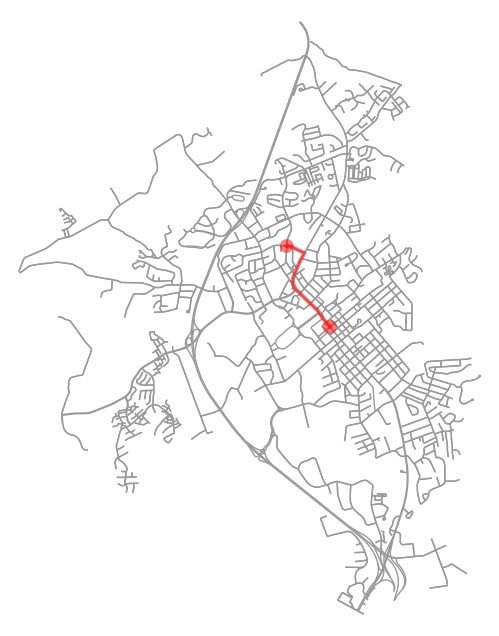

In [7]:
import matplotlib.pyplot as plt

# Plot the road network and the shortest path
fig, ax = ox.plot_graph_route(
    G, 
    route=shortest_path, 
    route_linewidth=3, 
    node_size=0, 
    bgcolor="white"
)
plt.show()


Multi-stop path found!
Shortest path: [729484671, 726782425, 726758896, 726760647, 729488774, 729488887, 726767617, 216471329, 726773119, 216474016, 216475664, 216464362, 5879243701, 5879243707, 216434655, 729524223, 724830186, 1533386441, 1444098616, 1444098620, 724829991, 724830252, 729484737, 726760156, 726768218, 726777615, 726760648, 726766294, 216451169, 919247234, 700331123, 700331105, 700331164, 615112623, 734835072, 615112633, 734835612, 615112636, 734835775, 726763091, 734835936, 624641759, 615113756, 726761198, 274176452, 726767853, 734834984, 734835075]


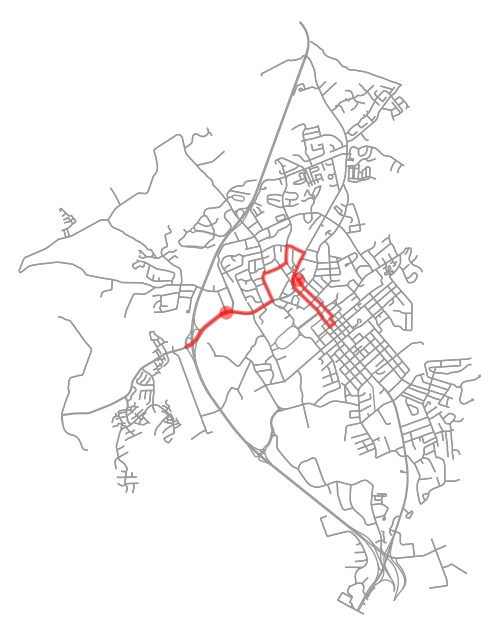

/var/folders/x6/sc1l9n8n0p1g5x042tlggs6h0000gn/T/ipykernel_33035/3518123595.py:74: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1),


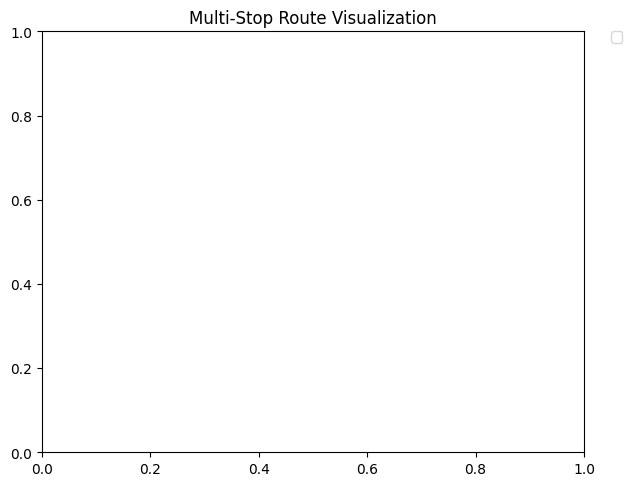

In [12]:
import os
import sys
import osmnx as ox
import matplotlib.pyplot as plt
from algorithms.aStar_multi import astar_pathfind_multi_stop

# Add the src directory to Python path
project_root = os.path.abspath(os.path.join(os.getcwd(), '../'))
sys.path.append(project_root)

# Load the road network
G = ox.load_graphml("../../data/blacksburg_road_network.graphml")

# Define the coordinates for stops (latitude, longitude)
locations = {
    "Kroger Gables": (37.2361, -80.4204),
    "Downtown": (37.2296, -80.4139),
    "Campus": (37.2431, -80.4226),
    "University Terrace": (37.2298, -80.4347),
    #"Golf Course": (37.2383, -80.4236),
}

# Find the nearest graph nodes for each location
nodes = {name: ox.distance.nearest_nodes(G, X=lon, Y=lat) 
         for name, (lat, lon) in locations.items()}

# Create the ordered route with location names
route_names = ["Kroger Gables", "Downtown", "Campus", "University Terrace"]
route = [nodes[name] for name in route_names]

# Find the shortest path for the multi-stop route
shortest_path = astar_pathfind_multi_stop(G, route)

# Check if a path was found
if shortest_path:
    print("Multi-stop path found!")
    print(f"Shortest path: {shortest_path}")
else:
    print("No path found for the given multi-stop route.")

# Visualize the Multi-Stop Path
fig, ax = ox.plot_graph_route(
    G,
    route=shortest_path,
    route_linewidth=3,
    node_size=0,
    bgcolor="white",
    route_color="red",
)

# Plot all stops with different colors
colors = ['red', 'blue', 'purple', 'green']  # Colors for each stop
zorder = 5  # Make sure points are plotted on top

# Plot each stop
for i, name in enumerate(route_names):
    node = nodes[name]
    x, y = G.nodes[node]['x'], G.nodes[node]['y']
    ax.scatter(x, y, 
              c=colors[i], 
              s=100, 
              zorder=zorder,
              label=name)
    
    # Add text label above the point
    ax.annotate(name, 
                (x, y), 
                xytext=(0, 10), 
                textcoords='offset points', 
                ha='center',
                fontsize=8)

# Add legend
plt.legend(bbox_to_anchor=(1.05, 1), 
          loc='upper left', 
          borderaxespad=0.)

# Adjust layout to prevent legend from being cut off
plt.tight_layout()

# Show the final plot
plt.title("Multi-Stop Route Visualization")
plt.show()

In [14]:
import networkx as nx
import osmnx as ox

road_network_la = ox.load_graphml("../../data/LA_road_network.graphml")


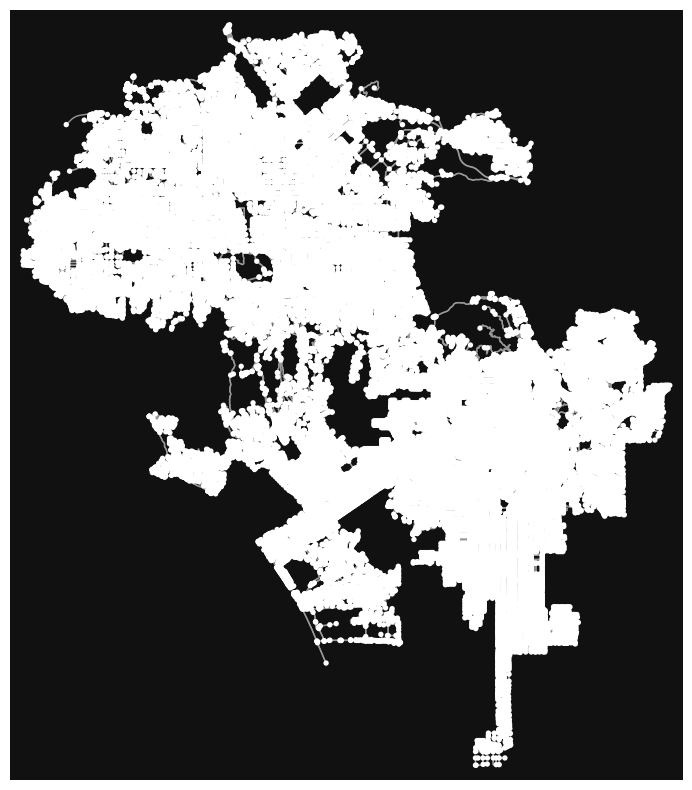

(<Figure size 1000x1000 with 1 Axes>, <Axes: >)

In [17]:
ox.plot_graph(road_network_la,figsize=(10,10))

In [22]:
for u ,v , key , data in road_network_la.edges(keys= True, data = True):
    print(u)
    print(v)
    print(key)
    print(data)
    break

653688
21300195
0
{'osmid': [907145138, 895315641, 895315642, 398770659], 'lanes': '6', 'name': 'National Boulevard', 'highway': 'secondary', 'maxspeed': '35 mph', 'oneway': False, 'reversed': False, 'length': 88.74600000000001, 'geometry': <LINESTRING (-118.43 34.027, -118.429 34.027, -118.429 34.027, -118.429 34.0...>}


In [23]:
for u ,v , key , data in road_network_la.edges(keys= True, data = True):
    data['weight'] = data.get('length',1)
    
# to ensure that weight is set to length or default to 1 if length of road is not given
# This weight is given to the A* algorithm

In [34]:
start_coords_la = (33.99518, -118.46849)

start_node_la = ox.distance.nearest_nodes(road_network_la,X=start_coords_la[1],Y=start_coords_la[0])

print(start_node_la)

122714118


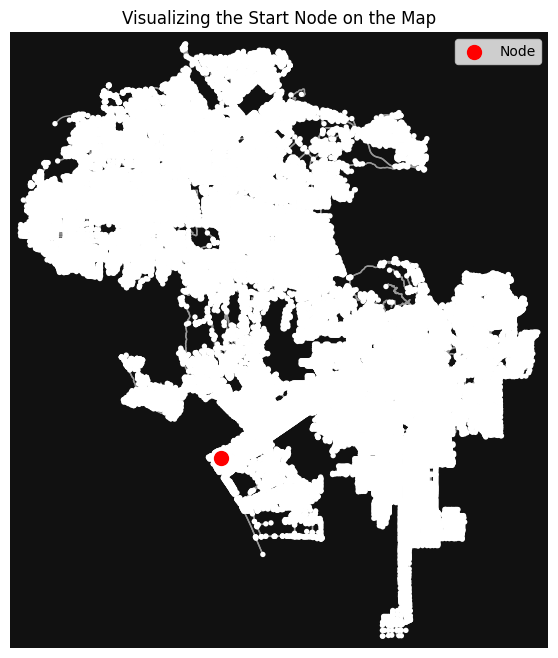

In [36]:
import matplotlib.pyplot as plt

# Plot the graph
fig, ax = ox.plot_graph(road_network_la, show=False, close=False)

# Plot the specific node
x, y = road_network_la.nodes[start_node_la]['x'], road_network_la.nodes[start_node_la]['y']
ax.scatter(x, y, c='red', s=100, label="Node")
plt.legend()
plt.title("Visualizing the Start Node on the Map")
plt.show()


In [39]:
goal_coords_la = (34.04295, -118.26714)

goal_node_la = ox.distance.nearest_nodes(road_network_la,X=goal_coords_la[1],Y=goal_coords_la[0])

print(goal_node_la)

277328790


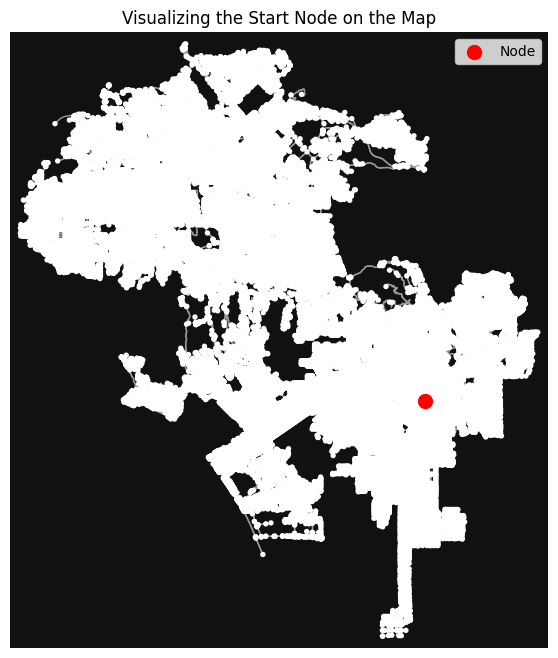

In [40]:
import matplotlib.pyplot as plt

# Plot the graph
fig, ax = ox.plot_graph(road_network_la, show=False, close=False)

# Plot the specific node
x, y = road_network_la.nodes[goal_node_la]['x'], road_network_la.nodes[goal_node_la]['y']
ax.scatter(x, y, c='red', s=100, label="Node")
plt.legend()
plt.title("Visualizing the Start Node on the Map")
plt.show()


In [ ]:
from algorithms.aStar_custom import astar_pathfinding
from algorithms.aStar_multi import astar_pathfind_multi_stop

locations = {
    "Venice": (33.99518, -118.46849),
    "Staples": {34.04295, -118.26714},
    "Griffith": (34.118511, -118.300371),
}

nodes_dict = {}
for name, (lat,lon) in locations.items() :
    nodes_dict[name] = ox.distance.nearest_nodes(road_network_la,X=lon,Y=lat)
    
    # Do we really need to store the locations name for now ? in this dict ?
  
print(nodes_dict)  


# Citing Stackoverflow


# In your current code, what Dictionary.update() does is that it updates (update means the value is overwritten from the value for same key in passed in dictionary) the keys in current dictionary with the values from the dictionary passed in as the parameter to it (adding any new key:value pairs if existing) . A single flat dictionary does not satisfy your requirement , you either need a list of dictionaries or a dictionary with nested dictionaries.

# If you want a list of dictionaries (where each element in the list would be a diciotnary of a entry) then you can make case_list as a list and then append case to it (instead of update) .

# Example -

# case_list = []
# for entry in entries_list:
#     case = {'key1': entry[0], 'key2': entry[1], 'key3':entry[2] }
#     case_list.append(case) 
    


{'Venice': 122714118, 'Staples': 277328790, 'Griffith': 122817922}


In [60]:
#Extract only the nodes from the nodes_list
#
route = [nodes_dict[key] for key in nodes_dict]

path = astar_pathfind_multi_stop(road_network_la,route)

if path:
    print("Multi stop path found")
    print(f"Shortest path found : {path}")
else:
    print("No path found")
    


Multi stop path found
Shortest path found : [122714118, 122714120, 122653036, 122653041, 122653044, 122653047, 122653050, 122653053, 122653056, 122653058, 122653062, 9406059481, 122653068, 122653071, 122653074, 122888928, 123533890, 122801306, 1773650086, 123750396, 122922905, 122983016, 123182551, 123599007, 123087090, 123087044, 123176875, 123621915, 123598480, 123520090, 123520094, 123386551, 8423641416, 123605357, 1637773600, 1637773575, 122733127, 122733129, 122958585, 123067319, 123067556, 122806777, 123067553, 122851682, 123066340, 123067550, 4007442289, 122842687, 123067543, 122886587, 122753001, 122981320, 4257945384, 4257945385, 122880639, 122814108, 122624836, 122755526, 122979063, 123067540, 123067538, 122971444, 123067535, 4923791045, 123067532, 123067528, 123067524, 122667730, 122956224, 122749668, 123037349, 123061851, 122622900, 123067520, 123067518, 123067516, 123067508, 3872869209, 601384553, 601384544, 1285296056, 122734179, 122554520, 122935717, 123067492, 123067489

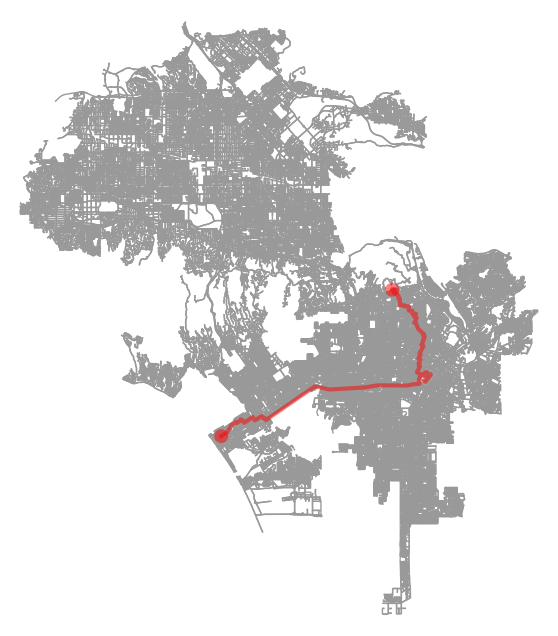

In [61]:
fig , ax = ox.plot_graph_route(
    road_network_la,
    route = path,
    route_linewidth = 3,
    node_size = 0,
    bgcolor = "white",
    
    route_color = "red"
)
plt.show()
